# Kinetics IX

[What is Bond listening to right now](https://www.youtube.com/watch?v=8fXqRAyu1d0&list=RD8fXqRAyu1d0&start_radio=1)

This Notebook continues our discussion of enzymatic reactions. We consider some methods of analysis and linearization, and we discuss various mechanisms of enzyme inhibition and ways to distinguish them based on experimental observations.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import scipy.stats as stats
from math import ceil, floor

## Example 01: Urea Decomposition

Urease is a metalloenzyme that contains $Ni^{2+}$ cations. It serves the important biological function (generally in plants) of decomposing urea (U) to form ammonia $(N\!H_3)$ and $CO_2$. It is proposed that urea decomposition occurs through a Michaelis-Menten mechanism, which we write in two steps:

\begin{align*}
    U + E \rightleftharpoons EU \\
    EU \rightarrow E + P \\
\end{align*}

Because it follows a Michaelis-Menten Mechanism, we know the overall rate law (See [Notebook 48](https://jqbond.github.io/CEN587/Notebooks/587-N48.html)). Specifically, the rate of reaction should have the following dependence on substrate concentration (Urea concentration).

$$r = \frac{V_\textrm{max}[U]}{K_M + [U]}$$

We are given the following experimental data (see cell below); show that it is consistent with a Michaelis-Menten rate law, and estiamate the value of the Michaelis-Menten parameters ($V_\textrm{max}$ and $K_M$).

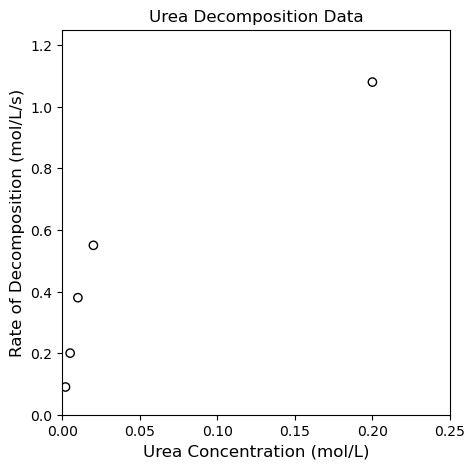

In [2]:
###################################################################################################
# Experimental data -- rates of urea decomposition measured at various concentrations of urea     #
###################################################################################################

CU   = np.array([0.002, 0.005, 0.01, 0.02, 0.2]) #Experimental values of urea concentration
rexp = np.array([0.09, 0.2, 0.38, 0.55, 1.08])   #Rates of urea decomposition measured at each above urea concentration

###################################################################################################
# Create scatterplot of rate vs. urea concentration                                               #
###################################################################################################

plt.figure(figsize = (5, 5))
plt.scatter(CU, rexp, color = 'none', edgecolor = 'black')
plt.title('Urea Decomposition Data')
plt.xlabel('Urea Concentration (mol/L)', fontsize = 12)
plt.ylabel('Rate of Decomposition (mol/L/s)', fontsize = 12)
plt.xlim(0, 0.25)
plt.ylim(0, 1.25)
plt.show()

### Solution to Example 01

Just from a simple, visual analysis, we can see that the data have a shape that ***could*** be attributed to a Michaelis-Menten Mechanism. At low concentrations, rate increases sharply with increasing concentration, and then at high concentrations, rate is not particularly sensitive to urea concentration. We haven't done anything rigorous yet, but this would be consistent with an Michaelis-Menten Mechanism, which predicts first order kinetics at low substrate concentrations and zero order kinetics at high substrate concentrations.

We should overlay model predictions with the measured data to see how well predictions align with experimental data. We can't do this until we have estimates for $K_M$ and $V_\mathrm{max}$, i.e., the Michaelis-Menten parameters. One useful skill is to learn how to generate rough parameter values without least squares minimization. Often, we can do this by studying limiting behavior. In the case of Michaelis-Menten kinetics, we know that the rate law should be:

$$r = \frac{V_\textrm{max}[U]}{K_M + [U]}$$

In the limit of very high substrate concentrations $([U] \rightarrow \infty)$, $K_M << [U]$, so: 

$$r = V_\textrm{max}$$

The highest concentration we've measured here is at 0.20 mol/L, where we measure a rate of 1.08 mol/L/s. Based on this measurement, we could say that if our system follows a Michaelis-Menten Mechanism, then the following is a good estimate for $V_\mathrm{max}$:

$$V_\textrm{max} \approx  1.08 \ \textrm{mol} \ \textrm{L}^{-1} \ \textrm{s}^{-1}$$

We should recognize that the highest experimental concentration of urea, $[U] = 0.2 \ \mathrm{M}$ is likely not large enough to say conclusively that $K_M << [U]$, but seeing that the rate of reaction is approaching zero order in urea concentration here, this is not a bad approximation, and it is far better than trying to blindly guess values of $V_{max}$ to pass into an optimization routine as initial guesses.

Analogously, if we look at low concentration data, say rates measured at 0.002 and 0.005 mol/L, we can say in this regime that (probably) $K_M >> [U]$. In this limit, we would observe:

$$r = \frac{V_\textrm{max}}{K_M}[U]$$

In other words, rate scales linearly with urea concentration, and the slope of that line should be the ratio of $V_\mathrm{max}$ to $K_M$. We can fit a line to the two lowest concentration data points to get an estimate for $K_M$. This is done in the cell below.

m    =  4.07e+01 +/- 2.19e+01
SSE  =      0.00
SST  =      0.01
MSE  =      0.00
RMSE =      0.01
R2   =      0.99
KM   =      0.03


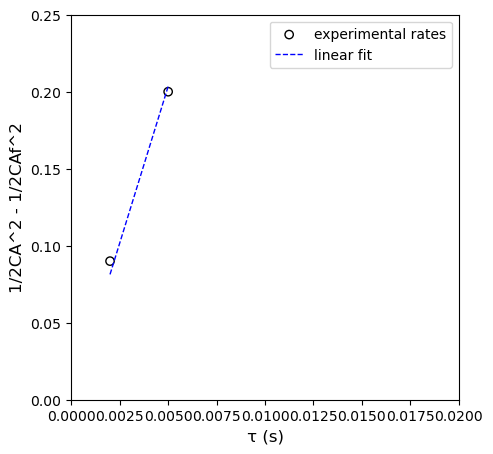

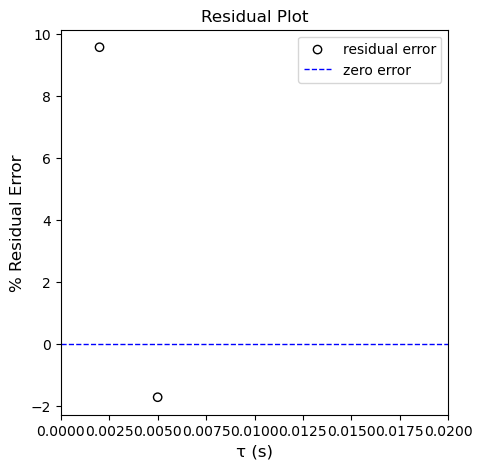

Rough estimates for Vmax and KM are 1.080 mol/L/s and 0.027 mol/L


In [3]:
#####################################################################################################
# Define the xdata array and ydata array                                                            #
#####################################################################################################

ydata = np.array([0.09, 0.2])
xdata = np.array([0.002, 0.005]).reshape(2,1)

#####################################################################################################
# Define the X matrix and Y array                                                                   #
#####################################################################################################

Y     = ydata
X     = xdata

#####################################################################################################
# Solve the least squares problem to find the best fit coefficients                                 #
#####################################################################################################

A      = np.linalg.solve(X.T@X, X.T@Y) 

#####################################################################################################
# Workup and analysis for quantifying and visualizing goodness of fit                               #
#####################################################################################################

Ypred  = X@A                          #Calculate discrete array of predicted y values at each x value
Ybar   = np.mean(ydata)               #Calculate the mean of the measured y values, use for SST calculation
Ndata  = len(ydata)                   #Calculate the number of data points/measurementws
SSE1   = np.sum((Y - Ypred)**2)       #Calculate residual sum of squares using intuitive summation formula
SSE2   = (Y - X@A).T@(Y - X@A)        #Calculate residual sum of squares using matrix multiplication; equivalent to SSE1
SST    = np.sum((Y - Ybar)**2)        #Calculate total sum of squares; assumes model is just y_pred = mean(ydata)
MSE    = SSE1/Ndata                   #Calculate mean square error
RMSE   = np.sqrt(MSE)                 #Calculate root mean square error
R2     = 1 - SSE1/SST                 #Calculate R2 (coefficient of determination)
DOF    = len(ydata) - len(A)          #Count degrees of freedom
s2     = SSE1/DOF                     #Estimate variance
COV    = s2*np.linalg.inv(X.T@X)      #Generate the covariance matrix for this fit
m      = A[0]                         #This is a linear model; with the way we define the X matrix, slope is A[0], intercept is A[1]
SEm    = np.sqrt(COV[0, 0])           #For our definition of the X matrix, standard error in the slope is the first diagonal element in COV
tval   = stats.t.ppf(0.975, DOF)      #t distribution for 95% confidence interval t(1 - α/2, DOF), α = 0.05 for 95% confidence interval
CIm    = SEm*tval                     #confidence interval on slope

#####################################################################################################
# defining MM parameters                                                                            #
#####################################################################################################

Vmax_r  = 1.08 #mol/L/s
KM_r    = Vmax_r/m #mol/L

############################################################################################
# Printing results using f strings; create arrays of labels and values                     #
############################################################################################

labels = ['m', 'SSE', 'SST','MSE','RMSE', 'R2', 'KM']
values = [m  ,  SSE1,  SST , MSE , RMSE ,  R2 ,  KM_r]

for label, value in zip(labels, values):
    if label == 'm':
        print(f'{label:4s} = {value:9.2e} +/- {CIm:8.2e}')
    else:
        print(f'{label:4s} = {value:9.2f}')

############################################################################################
# Visualizing results; overlay data and regressed y(x)                                     #
############################################################################################

plt.figure(figsize = (5, 5))
plt.scatter(xdata, ydata, marker = 'o', color = 'none', edgecolor = 'black', label = 'experimental rates')
plt.plot(xdata, Ypred, color = 'blue', linestyle = 'dashed', linewidth = 1, label = 'linear fit')
plt.xlim(0, 0.02)
plt.ylim(0, 0.25)
plt.xlabel('τ (s)', fontsize = 12)
plt.ylabel('1/2CA^2 - 1/2CAf^2', fontsize = 12)
plt.legend()
plt.show()

############################################################################################
# Visualizing results; plot of residual errors                                             #
############################################################################################

plt.figure(figsize = (5, 5))
plt.scatter(xdata, (Y - Ypred)/Y*100, marker = 'o', color = 'none', edgecolor = 'black', label = 'residual error')
plt.hlines(0, floor(min(X[:, 0])), ceil(max(X[:,0])), color = 'blue', linestyle = 'dashed', linewidth = 1, label = 'zero error')
plt.xlim(0, 0.02)
plt.xlabel('τ (s)', fontsize = 12)
plt.ylabel('% Residual Error', fontsize = 12)
plt.title('Residual Plot')
plt.legend(loc = 'upper right')
plt.show()


print(f'Rough estimates for Vmax and KM are {Vmax_r:3.3f} mol/L/s and {KM_r:3.3f} mol/L')

With these estimates established, we can overlay the rate predicted for a Michaelis-Menten mechanism with our data. We also add a calculation of residual sum of squares, $SS$, and the coefficient of determination, $R^2$, using these parameter estimates.

With our rough approximation, the SSE is 0.032, and the R2 is 0.948


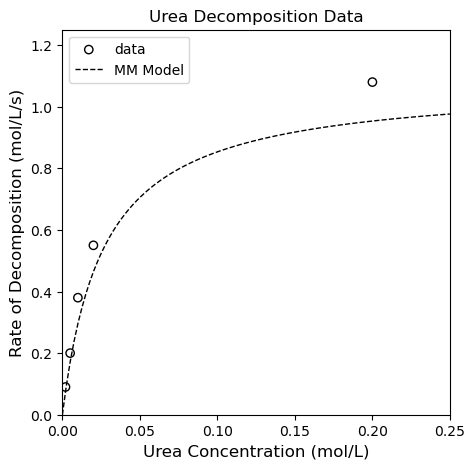

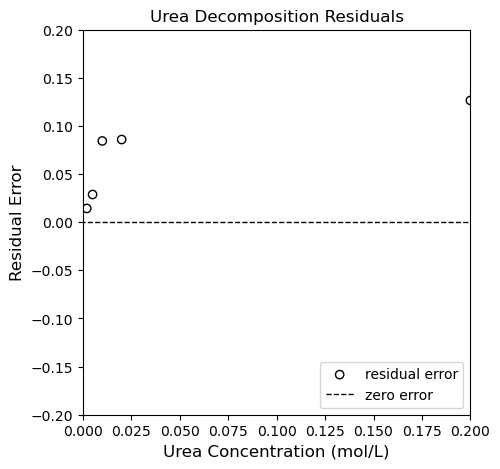

In [4]:
#############################################################################################
# Define a function to calculate rate predicted from MM mechanism                           #
#############################################################################################

def rMM(Vmax, KM, CU):
    rate = Vmax*CU/(KM+CU)
    return rate

#############################################################################################
# Generate overlay of model predictions on finely spaced CU values with experimental data   #
# This will also calculate SSE and R2 for the rough estimates generated from limit analysis #
############################################################################################# 

CUfine  = np.linspace(0, 0.25, 100)
rpred   = rMM(Vmax_r, KM_r, CU)
resid   = rexp - rpred
SSE     = np.sum(resid**2)
SST     = np.sum((rexp - np.mean(rexp))**2)
R2      = 1 - SSE/SST
print(f'With our rough approximation, the SSE is {SSE:3.3f}, and the R2 is {R2:3.3f}')

#############################################################################################
# Overaly model predictions with experimental measurements                                  #
#############################################################################################

plt.figure(figsize = (5, 5))
plt.scatter(CU, rexp, color = 'none', edgecolor = 'black', label = 'data')
plt.plot(CUfine, rMM(Vmax_r, KM_r, CUfine), color = 'black', linestyle = 'dashed', linewidth = 1, label = 'MM Model')
plt.title('Urea Decomposition Data')
plt.xlabel('Urea Concentration (mol/L)', fontsize = 12)
plt.ylabel('Rate of Decomposition (mol/L/s)', fontsize = 12)
plt.xlim(0, 0.25)
plt.ylim(0, 1.25)
plt.legend()
plt.show()

#############################################################################################
# Visualize residual error using rough estimats obtained from limit analysis                #
#############################################################################################

plt.figure(figsize = (5, 5))
plt.scatter(CU, resid, color = 'none', edgecolor = 'black', label = 'residual error')
plt.title('Urea Decomposition Residuals')
plt.xlabel('Urea Concentration (mol/L)', fontsize = 12)
plt.ylabel('Residual Error', fontsize = 12)
plt.xlim(0, 0.20)
plt.ylim(-0.2, 0.2)
plt.hlines(0, -0.2, 0.2, color = 'black', linestyle = 'dashed', linewidth = 1, label = 'zero error')
plt.legend(loc = 'lower right')
plt.show()

#### Nonlinear Regression

From the overlay and residual plot above, we can see that the rough estimates obtained by analysis of limiting behavior are are ***not bad***!  They generally capture the shape of the data and the order of magnitude of the rates. That said, the residual plot does show a systematic underprediction of our experimental data. We can do much beter using an optimization routine to minimize the residual sum of squares. Generally speaking this is the method of ***nonlinear regression***, which requires us to create an objective function that calculates the residual sum of squares as a function of parameter values:

$$SSE = \sum_i (r_i - \hat{r}_i)^2$$

In this case, we have a ***multivariate*** objective function that will depend on both $V_\mathrm{max}$ and $K_M$. Once we create an appropriate function, we can use `scipy.optimize.minimize()` to find the optimum parameter values. 

Using nonlinear regression, Vmax = 1.206, KM = 0.023, SSE = 0.001, and R2 = 0.999


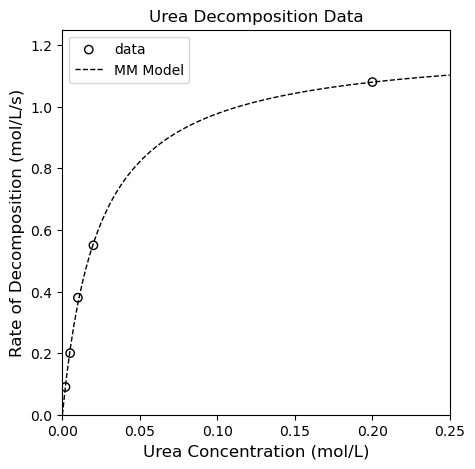

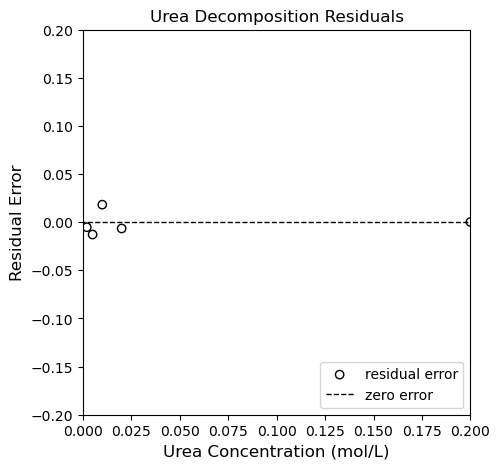

In [5]:
#########################################################################################################
# Create the objective function; it is of the form f([Vmax, KM]) and it returns SSE                     #
#########################################################################################################

def obj1(par):
    Vmax, KM = par
    rpred    = rMM(Vmax, KM, CU)
    resid    = (rexp - rpred)
    SSE      = np.sum(resid**2)
    return SSE

#########################################################################################################
# Define initial guesses for parameters; our rough estimates are very good initial guesses              #
#########################################################################################################

par0 = [Vmax_r, KM_r]

#########################################################################################################
# Optimize the objective function, bind relevant quantities from solution structure to variable names   #
#########################################################################################################

ans1 = opt.minimize(obj1, par0)
SSE  = ans1.fun
Vmax_opt, KM_opt = ans1.x

#########################################################################################################
# Calculate SST (total sum of squares) and R2, print various results                                    #
#########################################################################################################

SST  = np.sum((rexp - np.mean(rexp))**2)
R2   = 1 - SSE/SST
print(f'Using nonlinear regression, Vmax = {Vmax_opt:3.3f}, KM = {KM_opt:3.3f}, SSE = {SSE:3.3f}, and R2 = {R2:3.3f}')

#########################################################################################################
# Generate model predictions on fine grid of CU values using optimum parameter set                      #
#########################################################################################################

rMM2    = Vmax_opt*CUfine/(KM_opt + CUfine)
resid   = rexp - Vmax_opt*CU/(KM_opt + CU)

#########################################################################################################
# Overlay experimental data with model predictions using optimal parameter set                          #
#########################################################################################################

plt.figure(figsize = (5, 5))
plt.scatter(CU, rexp, color = 'none', edgecolor = 'black', label = 'data')
plt.plot(CUfine, rMM(Vmax_opt, KM_opt, CUfine), color = 'black', linestyle = 'dashed', linewidth = 1, label = 'MM Model')
plt.title('Urea Decomposition Data')
plt.xlabel('Urea Concentration (mol/L)', fontsize = 12)
plt.ylabel('Rate of Decomposition (mol/L/s)', fontsize = 12)
plt.xlim(0, 0.25)
plt.ylim(0, 1.25)
plt.legend()
plt.show()

#########################################################################################################
# Generate residual plot                                                                                #
#########################################################################################################

plt.figure(figsize = (5, 5))
plt.scatter(CU, resid, color = 'none', edgecolor = 'black', label = 'residual error')
plt.title('Urea Decomposition Residuals')
plt.xlabel('Urea Concentration (mol/L)', fontsize = 12)
plt.ylabel('Residual Error', fontsize = 12)
plt.xlim(0, 0.20)
plt.ylim(-0.2, 0.2)
plt.hlines(0, -0.2, 0.2, color = 'black', linestyle = 'dashed', linewidth = 1, label = 'zero error')
plt.legend(loc = 'lower right')
plt.show()

This does a much better job of capturing the observed trends, and we see the residuals are now nicely scattered around the line of zero error, which is indicative that our model captures the data (and that deviations from zero error are attributable to random errors in the measurement).

### Linearization of MM rate expression: The Lineweaver-Burk model

It is frequently useful to linearize models, so we will look for a way to do so. Linearization is beneficial because it allows us to use the robust tools of linear least squares (which are far more stable than iterative, numerical, nonlinear regression). It also gives us quick, easy diagnostic test to assess goodness of fit in that we can quickly tell if "linearized" data actually fall onto a straight line. For enzyme kinetics, a common linearization method is that of Lineweaver-Burk.We start with the Michaelis-Menten rate expression:

$$r = \frac{V_\textrm{max}[U]}{K_M + [U]}$$

We next resist the urge to take logarithms of both sides. A logarithmic transformation is not an effective linearization strategy here. Instead, we make note of the fact that this rate expression is a monomial, $V_\mathrm{max}[U]$, divided by a polynomial, $(K_M + [U])$. We can generally linearize models of this form by inverting the expression. In this case:

$$\frac{1}{r} = \frac{K_M + [U]}{V_\textrm{max}[U]}$$

We can divide each term in the numerator by the monomial denominator to find:

$$\frac{1}{r} = \frac{K_M}{V_\textrm{max}}\frac{1}{[U]} + \frac{1}{V_\textrm{max}}$$

Now we should be able to see that this is a $Y = mX + b$ equation form. If this reaction follows a Michaelis-Menten mechanism and we plot $\frac{1}{r}$ against $\frac{1}{[U]}$, we should see data fall onto a straight line. Further, we can estimate the $V_\mathrm{max}$ and $K_M$ from the slope and y-intercept.

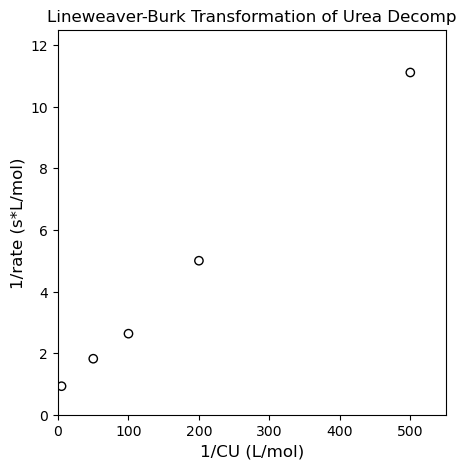

In [6]:
################################################################################################
# Graphing a Lineweaver-Burk linearization of enzymatic rate data                              #
################################################################################################

plt.figure(figsize = (5, 5))
plt.scatter(1/CU, 1/rexp, color = 'none', edgecolor = 'black')
plt.title('Lineweaver-Burk Transformation of Urea Decomp')
plt.xlabel('1/CU (L/mol)', fontsize = 12)
plt.ylabel('1/rate (s*L/mol)', fontsize = 12)
plt.xlim(0, 550)
plt.ylim(0, 12.5)
plt.show()

### Linear Regression

That looks pretty linear (as it should); let's regress the slope and intercept using linear regression.  We know that, for a linearized MM model:

$$m = \frac{K_M}{V_\textrm{max}}$$

And that:

$$b = \frac{1}{V_\textrm{max}}$$

We can easily rearrange those to solve for our parameters of interest:

$$V_\textrm{max} = \frac{1}{b}$$

and

$$K_M = V_\textrm{max}m$$

m    =  2.07e-02 +/- 1.08e-03
b    =  7.53e-01 +/- 2.65e-01
SSE  =      0.05
SST  =     67.21
MSE  =      0.01
RMSE =      0.10
R2   =      1.00
Vmax =      1.33
KM   =      0.03


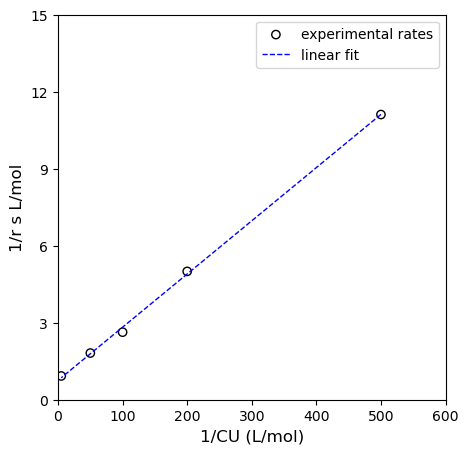

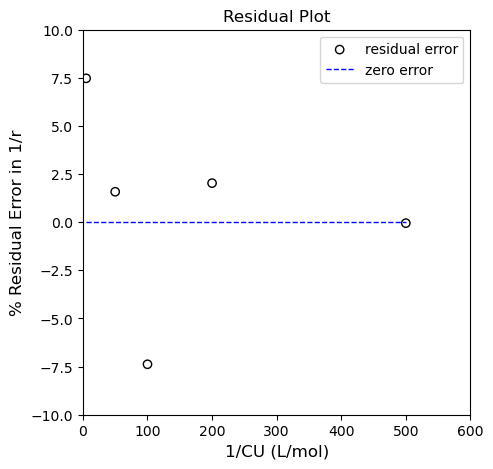

In [7]:
xdata = 1/CU
ydata = 1/rexp
#####################################################################################################
# Define the xdata array and ydata array                                                            #
#####################################################################################################

ydata = 1/rexp
xdata = 1/CU

#####################################################################################################
# Define the X matrix and Y array                                                                   #
#####################################################################################################

Y     = ydata
X     = np.vander(xdata,2) #This creates the X matrix shown above, truncating at 1st order

#####################################################################################################
# Solve the least squares problem to find the best fit coefficients                                 #
#####################################################################################################

A      = np.linalg.solve(X.T@X, X.T@Y) 

#####################################################################################################
# Workup and analysis for quantifying and visualizing goodness of fit                               #
#####################################################################################################

Ypred  = X@A                          #Calculate discrete array of predicted y values at each x value
Ybar   = np.mean(ydata)               #Calculate the mean of the measured y values, use for SST calculation
Ndata  = len(ydata)                   #Calculate the number of data points/measurementws
SSE1   = np.sum((Y - Ypred)**2)       #Calculate residual sum of squares using intuitive summation formula
SSE2   = (Y - X@A).T@(Y - X@A)        #Calculate residual sum of squares using matrix multiplication; equivalent to SSE1
SST    = np.sum((Y - Ybar)**2)        #Calculate total sum of squares; assumes model is just y_pred = mean(ydata)
MSE    = SSE1/Ndata                   #Calculate mean square error
RMSE   = np.sqrt(MSE)                 #Calculate root mean square error
R2     = 1 - SSE1/SST                 #Calculate R2 (coefficient of determination)
DOF    = len(ydata) - len(A)          #Count degrees of freedom
s2     = SSE1/DOF                     #Estimate variance
COV    = s2*np.linalg.inv(X.T@X)      #Generate the covariance matrix for this fit
m      = A[0]                         #This is a linear model; with the way we define the X matrix, slope is A[0], intercept is A[1]
b      = A[1]                         #This is a linear model; with the way we define the X matrix, slope is A[0], intercept is A[1] 
SEm    = np.sqrt(COV[0, 0])           #For our definition of the X matrix, standard error in the slope is the first diagonal element in COV
SEb    = np.sqrt(COV[1, 1])           #For our definition of the X matrix, standard error in the intercept is the second diagonal element in COV
tval   = stats.t.ppf(0.975, DOF)      #t distribution for 95% confidence interval t(1 - α/2, DOF), α = 0.05 for 95% confidence interval
CIm    = SEm*tval                     #confidence interval on slope
CIb    = SEb*tval                     #confidence interval on intercept
Vmax   = 1/b                          #y lintercept = 1/Vmax
KM     = Vmax*m                       #slope = KM/Vmax

############################################################################################
# Printing results using f strings; create arrays of labels and values                     #
############################################################################################

labels = ['m', 'b', 'SSE', 'SST','MSE','RMSE', 'R2', 'Vmax', 'KM']
values = [m  ,  b ,  SSE1,  SST , MSE , RMSE ,  R2, Vmax, KM]

for label, value in zip(labels, values):
    if label == 'm':
        print(f'{label:4s} = {value:9.2e} +/- {CIm:8.2e}')
    elif label == 'b':
        print(f'{label:4s} = {value:9.2e} +/- {CIb:8.2e}')
    else:
        print(f'{label:4s} = {value:9.2f}')

############################################################################################
# Visualizing results; overlay data and regressed y(x)                                     #
############################################################################################

plt.figure(figsize = (5, 5))
plt.scatter(xdata, ydata, marker = 'o', color = 'none', edgecolor = 'black', label = 'experimental rates')
plt.plot(xdata, Ypred, color = 'blue', linestyle = 'dashed', linewidth = 1, label = 'linear fit')
plt.xlim(0, 600)
plt.ylim(0, 15)
plt.yticks(np.arange(0, 16, 3))
plt.xlabel('1/CU (L/mol)', fontsize = 12)
plt.ylabel('1/r s L/mol', fontsize = 12)
plt.legend()
plt.show()

############################################################################################
# Visualizing results; plot of residual errors                                             #
############################################################################################

plt.figure(figsize = (5, 5))
plt.scatter(xdata, (Y - Ypred)/Y*100, marker = 'o', color = 'none', edgecolor = 'black', label = 'residual error')
plt.hlines(0, floor(min(X[:, 0])), ceil(max(X[:,0])), color = 'blue', linestyle = 'dashed', linewidth = 1, label = 'zero error')
plt.xlim(0, 600)
plt.ylim(-10, 10)
plt.xlabel('1/CU (L/mol)', fontsize = 12)
plt.ylabel('% Residual Error in 1/r', fontsize = 12)
plt.title('Residual Plot')
plt.legend(loc = 'upper right')
plt.show()

## Enzyme Inhibition Mechanism 1

Like most catalysts, enzymes are sensitive to the presence of impurities, side products, or various species that can interact with the catalyst, bind to the active site or to activated complexes, and cause it to become inactive and unable to convert reactants into products.  We will consider two mechanisms of enzyme inhibition and consider how we can discern the more likely mechanism from analysis of experimental data. We start with an enzyme catalyzed reaction as usual. What we see at the macroscale in the lab looks like this:

### Overal Reaction

$$E + S \longrightarrow E + P$$

But we also know that, in reality, the reaction is going to proceed through a mechanism that involves multiple elementary steps. In this case, we propose that the reaction follows a standard Michaelis-Menten mechanism, but with a small twist: the free enzyme can also bind (reversibly) with an inhibitor (I) that is present in the reaction media. This forms an enzyme-inhibitor complex that is inactive. Based on this conceptual description, we can write the following reaction mechanism.

```{important}
Observe that this is just a slight modification to the classic Michaelis-Menten Mechanism! The only change is a single elementary step that describes the type of inhibition.
```

### Mechanism

\begin{align*}
    E + S &\rightleftharpoons ES \\
    ES &\rightarrow E + P \\
    E + I &\rightleftharpoons EI \\
\end{align*}

### Analysis

If we study the overall reaction and each elementary step, we should be able to determine that the overall rate of reaction is equal to the rate of consumption of substrate (S), and it is equal to the rate of formation of the product (P). We will choose to write an overall rate expression based on the rate of product formation.

$$r = R_P$$

Now we look at the elementary steps; we can evaluate the production rate of $P$. It only appears as a product in step 2, so $R_P = r_2$, which means:

$$r = r_2$$

Now we expand the rate expression for step two:

$$r = k_2[ES]$$

This tells us that the rate of reaction has a first order dependence on the concentration of the enzyme-substrate complex. We will treat the enzyme-substrate complex as a "reactive intermediate" and apply the Pseudo-Steady State Approximation. According to the PSSA, we can say that the net production rate of the reactive intermediate is zero:

$$R_{ES} = 0 = r_1 - r_2$$

We can then expand the rate expressions:

$$0 = k_1[S][E] - k_{-1}[ES] - k_2[ES]$$

```{tip}
It is helpful to try to solve for the enzyme-substrate complex (or any species bound to a catalyst) as a function of the "free catalyst sites". This makes the algebra very easy later in our analysis we introduce a site balance. 
```

Solving the above PSSH equation for [ES]:

$$[ES] = \frac{k_1}{k_{-1} + k_2} [S][E]$$

Since we've already introduced the MM parameters $K_M$ and $V_\textrm{max}$, we recognize that the ratio of rate constants in the above equation is the inverse of $K_M$:

$$[ES] = \frac{1}{K_M} [S][E]$$

Now we try to resolve the concentration of free enzyme, $E$, using a **site balance**:

$$[E_t] = [E] + [ES] + [EI]$$

Unlike the base MM mechanism, we see that the enzyme is now distributed between 3 states, free enzyme $(E)$, enzyme-substrate complex $(ES)$, and the inactive enzyme-inhibitor complex $(EI)$. Before we can solve the site balance for free enzyme concentration, $[E]$, we need to resolve the concentration of the inhibitor complex. We do this by writing another Pseudo-Steady State approximation on $EI$, which appears only in step 3:

$$R_{EI} = 0 = r_3$$

Expanding the elementary rate law:

$$R_{EI} = 0 = k_3[I][E] - k_{-3}[EI]$$

We see that this expression only has the inhibitor complex as an "unknown" PSSH intermediate, so we can solve for it in terms of free enzyme concentration.

$$[EI] = \frac{k_3}{k_{-3}}[I][E]$$

For an elementary step, we recall that:

$$K_{C,i} = \frac{k_{f,i}}{k_{r,i}}$$

So we replace the rate constant ratio with a concentration-based equilibrium constant, $K_C$:

$$[EI] = K_{3_C}[I][E]$$

Here we have expressed $[EI]$ as a function of free enzyme as we've done previously with $[ES]$.  Now we can substitute both of these expressions into the site balance:

$$[E_t] = [E] + \frac{1}{K_M} [S][E] + K_{3_C}[I][E] $$

We now see that we only have a single "unknown" here, which is the free enzyme concentration. Even better, we've approached the solution in such a way that every term in the polynomial on the right hand side has a linear dependence on $[E]$, which makes it straightforward to solve for $[E]$:

$$[E] = \frac{[E_t]}{1 + \frac{1}{K_M}[S] + K_{3_C}[I]}$$

Now we've expressed all of the PSSH intermediates and the free enzyme concentration in terms of measurable or known quantities, so we start building up our rate expression by substituting them back into the starting point:

The overall rate of reaction is equal to the rate of the step where the product is formed:

$$r = k_2[ES]$$

Next:

$$r = \frac{k_2}{K_M} [E][S]$$

Finally substituting in the free enzyme concentration:

$$r = \frac{k_2[E_t][S]}{K_M\left(1 + \frac{1}{K_M}[S] + K_{3_C}[I]\right)}$$

Distributing the $K_M$ term in the denominator gives:

$$r = \frac{k_2[E_t][S]}{K_M + [S] + K_MK_{3_C}[I]}$$

And we group the terms multipled by $K_M$ to get:

$$r = \frac{k_2[E_t][S]}{[S] + K_M(1 + K_{3_C}[I])}$$

Noticing the product of $k_2[E_t]$ in the numerator, we recall that this is equal to $V_\textrm{max}$, which gives the final rate expression for this mechanism:

$$r = \frac{V_\textrm{max}[S]}{[S] + K_M(1 + K_{3_C}[I])}$$

It is worth comparing this result with the classic MM mechanism:

$$r = \frac{V_\textrm{max}[S]}{[S] + K_M}$$

We can see that the more complex mechanism approaches the MM Mechanism in the limit where the inhibitor concentration is zero. This is a great consistency check!!

## Enzyme Inhibition Mechanism 2

Now we will consider a second mechanism of enzyme inhibition.  Here, we propose that the overall reaction is the same as above:

### Overall

$$E + S \longrightarrow E + P$$

We again propose that the main mechanism is a baseline Michaelis-Menten Mechanism, but here we also say that there is an inhibitor present, and that it binds (reversibly) with the enzyme substrate complex, converting it to an inactive form that cannot transform the substrate into products:

```{important}
Make sure you can understand the fundamental difference between this inhibition mechanism (inhibitor binds to enzyme-substrate complex) and the first one that we considered (inhibitor binds directly to enzyme). Think about the different elementary steps that you would write to describe these two distinct types of inhibition.
```

### Mechanism

\begin{align}
    E + S &\rightleftharpoons ES \\
    ES &\rightarrow E + P \\
    ES + I &\rightleftharpoons IES \\
\end{align}

### Analysis

The overall rate of reaction is equal to the rate of formation of the product $(P)$, so we write the overall rate expression based on the rate of product formation:

$$r = R_P$$

$P$ only appears as a product in step 2, so $R_P = r_2$, which means:

$$r = r_2$$

Expanding the rate expression for step two:

$$r = k_2[ES]$$

We treat the enzyme-substrate complex as a "reactive intermediate" and apply the Pseudo-Steady State Approximation. Here we note a change from the base case Michaelis-Menten analysis in that the enzyme substrate complex is consumed as a reactant in step 3:

$$R_{ES} = 0 = r_1 - r_2 - r_3$$

Expanding the rate expressions:

$$0 = k_1[S][E] - k_{-1}[ES] - k_2[ES] - (k_3[I][ES] - k_{-3}[IES])$$

We can pause here and remind ourselves that we would like to solve for the concentration of the enzyme substrate complex, $[ES]$ as a function of free enzyme concentration, $[E]$. We can't do that yet because the concentration of the inhibitor-enzyme-substrate complex, $[IES]$ appears in the PSSH expression above. This is a reactive intermediate, and we need to express its concentration in terms of stable species and rate constants, so we write the PSSH on IES:

$$R_{IES} = 0 = r_3$$

We expand this elementary rate expression:

$$R_{IES} = 0 = k_3[I][ES] - k_{-3}[IES]$$

Now we have basically two equations (PSSH on $ES$ and on $IES$) and two unknowns ($[ES]$ and $[IES]$). We can solve the system, but it is worth strategizing about how to approach the solution. One major thing to notice is that the PSSH on $IES$ requires that $r_3 = 0$. This allows us to simplify the PSSH on $ES$ (see above) from $0 = r_1 - r_2 - r_3$ to:

$$R_{ES} = 0 = r_1 - r_2$$

Which expands to:

$$0 = k_1[S][E] - k_{-1}[ES] - k_2[ES]$$

This is identical to what we solved for the classic Michaelis-Menten and the first enzyme inhibition case. We can solve this expression for $[ES]$ as a function of free enzyme concentration, $[E]$, which is usually best practice in the analysis of catalytic mechanisms.

$$[ES] = \frac{k_1}{k_{-1} + k_2} [S][E]$$

We can replace the ratio of rate constants with $K_M$:

$$[ES] = \frac{1}{K_M} [S][E]$$

With that established, we can work on solving for $[IES]$. Starting with the PSSH expression:

$$0 = k_3[I][ES] - k_{-3}[IES]$$

We find that:

$$[IES] = \frac{k_3}{k_{-3}}[I][ES]$$

We remember that, for an elementary step, the ratio of forward-to-reverse rate constants is equal to $K_C$; thus:

$$[IES] = K_{3_C}[I][ES]$$

We already solved for $[ES]$ so we make the substitution:

$$[IES] = \frac{K_{3_C}}{K_M}[I][S][E]$$

Now we have both $[ES]$ and $[IES]$ expressed as functions of free enzyme concentration $[E]$. This makes it easy to solve for $[E]$ from the site balance:

$$[E_t] = [E] + [ES] + [IES]$$

Making substitutions:

$$[E_t] = [E] + \frac{1}{K_M} [S][E] + \frac{K_{3_C}}{K_M}[I][S][E]$$

We now have every term on the right hand side of our site balance expressed as a linear function of free enzyme concentation $[E]$, which makes for an easy solution:

$$[E] = \frac{[E_t]}{1 + \frac{1}{K_M}[S] + \frac{K_{3_C}}{K_M}[I][S]}$$

Now we just substitute everything back into the original expression for the overall reaction rate:

$$r = k_2[ES]$$

Next:

$$r = \frac{k_2}{K_M} [E][S]$$

Finally substituting in the free enzyme concentration:

$$r = \frac{k_2[E_t][S]}{K_M\left(1 + \frac{1}{K_M}[S] + \frac{K_{3_C}}{K_M}[I][S]\right)}$$

Distributing the $K_M$ term in the denominator gives:

$$r = \frac{k_2[E_t][S]}{K_M + [S] + K_{3_C}[I][S]}$$

Grouping the terms multipled by $[S]$ in the denominator:

$$r = \frac{k_2[E_t][S]}{K_M + [S](1 + K_{3_C}[I])}$$

Finally, replacing $k_2[E_t]$ in the numerator with $V_\textrm{max}$, we get the final rate expression for this mechanism:

$$r = \frac{V_\textrm{max}[S]}{K_M + [S](1 + K_{3_C}[I])}$$

It is worth comparing this result with the classic Michaelis-Menten result:

$$r = \frac{V_\textrm{max}[S]}{K_M + [S]}$$

And again we see that the more complex mechanism approaches the simpler Michaelis-Menten result in the limit where the inhibitor concentration is zero. If this were not the case, we should suspect that we did something wrong in our analysis.

## Distinguishing Between Mechanisms of Inhibition by linearization

### Michaelis-Menten

When we looked at the baseline MM Mechanism:

$$r = \frac{V_\textrm{max}[S]}{K_M + [S]}$$

We found that a useful linearization is the method of Lineweaver-Burk; we invert the rate expression, which gives us a linearized form:

$$\frac{1}{r} = \frac{K_M + [S]}{V_\textrm{max}[S]}$$

Dividing each term in the numerator polynomial by the denominator:

$$\frac{1}{r} = \frac{K_M}{V_\textrm{max}}\frac{1}{[S]} + \frac{1}{V_\textrm{max}}$$

That is the equation for a straight line if we let $Y = 1/r$ and $X = 1/[S]$.  We can get estimates for $K_M$ and $V_\textrm{max}$ from the regressed slope and intercept.

Now we look at our two inhibition mechanims and work through the same linearization strategy:

### Inhibition Mechanism 1: $I + E \rightleftharpoons EI$

$$r = \frac{V_\textrm{max}[S]}{[S] + K_M(1 + K_{3_C}[I])}$$

Inverting the expression:

$$\frac{1}{r} = \frac{[S] + K_M(1 + K_{3_C}[I])}{V_\textrm{max}[S]}$$

And distributing the denominator:

$$\frac{1}{r} = \frac{1}{V_\textrm{max}} + \frac{K_M(1 + K_{3_C}[I])}{V_\textrm{max}}\frac{1}{[S]}$$

Rearranging to $Y = mX + b$ form to compare with baseline expression directly:

$$\frac{1}{r} = \frac{K_M(1 + K_{3_C}[I])}{V_\textrm{max}}\frac{1}{[S]} + \frac{1}{V_\textrm{max}}$$

### Inhibition Mechanism 2: $I + ES \rightleftharpoons IES$

$$r = \frac{V_\textrm{max}[S]}{K_M + [S](1 + K_{3_C}[I])}$$

Inverting the expression:

$$\frac{1}{r} = \frac{K_M + [S](1 + K_{3_C}[I])}{V_\textrm{max}[S]}$$

And distributing the denominator:

$$\frac{1}{r} = \frac{K_M}{V_\textrm{max}}\frac{1}{[S]} + \frac{(1 + K_{3_C}[I])}{V_\textrm{max}}$$

This one is already in $Y = mX + b$ form.

### Comparing Linearized Expressions

\begin{align}
    \frac{1}{r} &= \frac{K_M}{V_\textrm{max}}\frac{1}{[S]} + \frac{1}{V_\textrm{max}} \\
    \\
    \frac{1}{r} &= \frac{K_M(1 + K_{3_C}[I])}{V_\textrm{max}}\frac{1}{[S]} + \frac{1}{V_\textrm{max}} \\
    \\
    \frac{1}{r} &= \frac{K_M}{V_\textrm{max}}\frac{1}{[S]} + \frac{(1 + K_{3_C}[I])}{V_\textrm{max}} \\
\end{align}


We can see that the impacts of inhibitor concentration will show up in the slopes and intercepts of the linearized data sets.  To resolve the dependencies, we would have to measure reaction rates at various concentrations of substrate ***for various concentrations of the inhibitor***.  Then, we would look at linearized data sets to see how the slope and intercept respond.

Let's look at the Case 1 linearization first:

$$\frac{1}{r} = \frac{K_M(1 + K_{3_C}[I])}{V_\textrm{max}}\frac{1}{[S]} + \frac{1}{V_\textrm{max}}$$

Here, we see that changing inhibitor concentration has no impact on the y-intercept.  It will always be equal to $1/V_\mathrm{max}$, no matter the inhibitor concentration.  The slope will change with inhibitor concentration, though.  It becomes larger (steeper) for higher inhibitor concentrations and smaller (shallower) for lower inhibitor concentrations.  This is illustrated in the graph below.

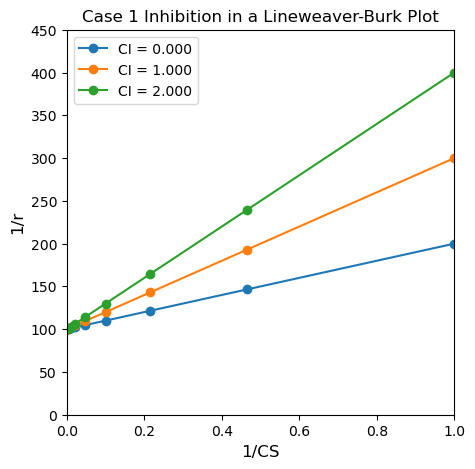

In [8]:
################################################################
# Assign arbitrary parameter values for illustration purposes  #
################################################################

K3 = 1
KM = 1
Vmax = 0.01

################################################################
# Define rate expression as a function of CS and CI            #
################################################################

r = lambda CS, CI: Vmax*CS/(CS + KM*(1 + K3*CI))


################################################################
# We want to see r vs [S] at various values of [I]             #
################################################################

CS_exp = np.logspace(0, 3, 10)
CI_exp = np.array([0.0, 1, 2.0])

################################################################
# Visualize r vs [S] at various values of [I]                  #
################################################################

plt.figure(figsize = (5, 5))
for i, value in enumerate(CI_exp):
    plt.plot(1/CS_exp, 1/r(CS_exp, value), marker = 'o', label = f'CI = {CI_exp[i]:3.3f}')
plt.title('Case 1 Inhibition in a Lineweaver-Burk Plot')
plt.xlabel('1/CS', fontsize = 12)
plt.ylabel('1/r', fontsize = 12)
plt.ylim(0, 450)
plt.xlim(0, 1)
plt.legend()
plt.show()

So we can see clearly that if we have Case 1 type inhibition ($I + E \rightleftharpoons EI$), we should be able to detect it from ***varying slopes*** in a Lineweaver-Burk plot when we obtain data at various inhibitor concentrations.

If instead we have Case 2 inhibition ($I + ES \rightleftharpoons IES$):

$$\frac{1}{r} = \frac{K_M}{V_\textrm{max}}\frac{1}{[S]} + \frac{(1 + K_{3_C}[I])}{V_\textrm{max}}$$

We should see the impact of changing inhibitor concentration in the y-intercept, whereas the slope in a Lineweaver-Burk plot will remain constant.  This behavior is illustrated below.

$$r = \frac{V_\textrm{max}[S]}{K_M + [S](1 + K_{3_C}[I])}$$

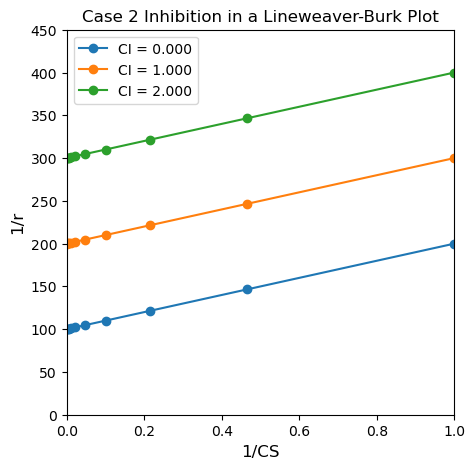

In [9]:
################################################################
# Assign arbitrary parameter values for illustration purposes  #
################################################################

K3 = 1
KM = 1
Vmax = 0.01

################################################################
# Define rate expression as a function of CS and CI            #
################################################################

r = lambda CS, CI: Vmax*CS/(KM + CS*(1 + K3*CI))

################################################################
# We want to see r vs [S] at various values of [I]             #
################################################################

CS_exp = np.logspace(0, 3, 10)
CI_exp = np.array([0.0, 1, 2.0])

################################################################
# Visualize r vs [S] at various values of [I]                  #
################################################################

plt.figure(1, figsize = (5, 5))
for i, value in enumerate(CI_exp):
    plt.plot(1/CS_exp, 1/r(CS_exp, value), marker = 'o', label = f'CI = {CI_exp[i]:3.3f}')
plt.title('Case 2 Inhibition in a Lineweaver-Burk Plot')
plt.xlabel('1/CS', fontsize = 12)
plt.ylabel('1/r', fontsize = 12)
plt.ylim(0, 450)
plt.xlim(0, 1)
plt.legend()
plt.show()